In [43]:
%%capture
%run pre_process.ipynb


<h1>Linear Regression Model</h1>

In [44]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
lr_predict=lr_model.predict(x_test)

In [45]:
lr_predict=lr_predict.reshape(-1,1)
lr_predict_test=np.concatenate([lr_predict,x_test],axis=1)

lr_predict_test=scaler.inverse_transform(lr_predict_test)

In [46]:
result=[]
for i in range(0,len(lr_predict_test)):
    result.append(lr_predict_test[i][0]+actual_sales[i])
lr_predict_series=pd.Series(result,name="Linear Prediction")
predict_df=predict_df.merge(lr_predict_series,left_index=True,right_index=True)
print(predict_df)

         date  Linear Prediction
0  2017-01-01       6.479148e+05
1  2017-02-01       6.283374e+05
2  2017-03-01       8.195190e+05
3  2017-04-01       9.436391e+05
4  2017-05-01       1.033653e+06
5  2017-06-01       1.065286e+06
6  2017-07-01       1.201561e+06
7  2017-08-01       1.002123e+06
8  2017-09-01       9.415142e+05
9  2017-10-01       9.080646e+05
10 2017-11-01       9.167461e+05
11 2017-12-01       6.947978e+05


<h1>Errors</h1>

In [47]:
#mean squared error
sqr_err=np.sqrt(mean_squared_error(predict_df["Linear Prediction"],monthly_sales['sales'][-12:]))
#mean absolute error
abs_err=mean_absolute_error(predict_df['Linear Prediction'],monthly_sales["sales"][-12:])
#r2_score
r2=re_score=(predict_df['Linear Prediction'],monthly_sales['sales'][-12:])

In [48]:
print(f'mean squared error: {sqr_err}\n absolute error: {abs_err}\nr2 score: \n{r2}')

mean squared error: 16221.272385416887
 absolute error: 12433.184266490765
r2 score: 
(0     6.479148e+05
1     6.283374e+05
2     8.195190e+05
3     9.436391e+05
4     1.033653e+06
5     1.065286e+06
6     1.201561e+06
7     1.002123e+06
8     9.415142e+05
9     9.080646e+05
10    9.167461e+05
11    6.947978e+05
Name: Linear Prediction, dtype: float64, 48     617306
49     621369
50     822667
51     938862
52    1020686
53    1064624
54    1171393
55    1026403
56     935263
57     891160
58     928837
59     695170
Name: sales, dtype: int64)


<h1>Plotting</h1>

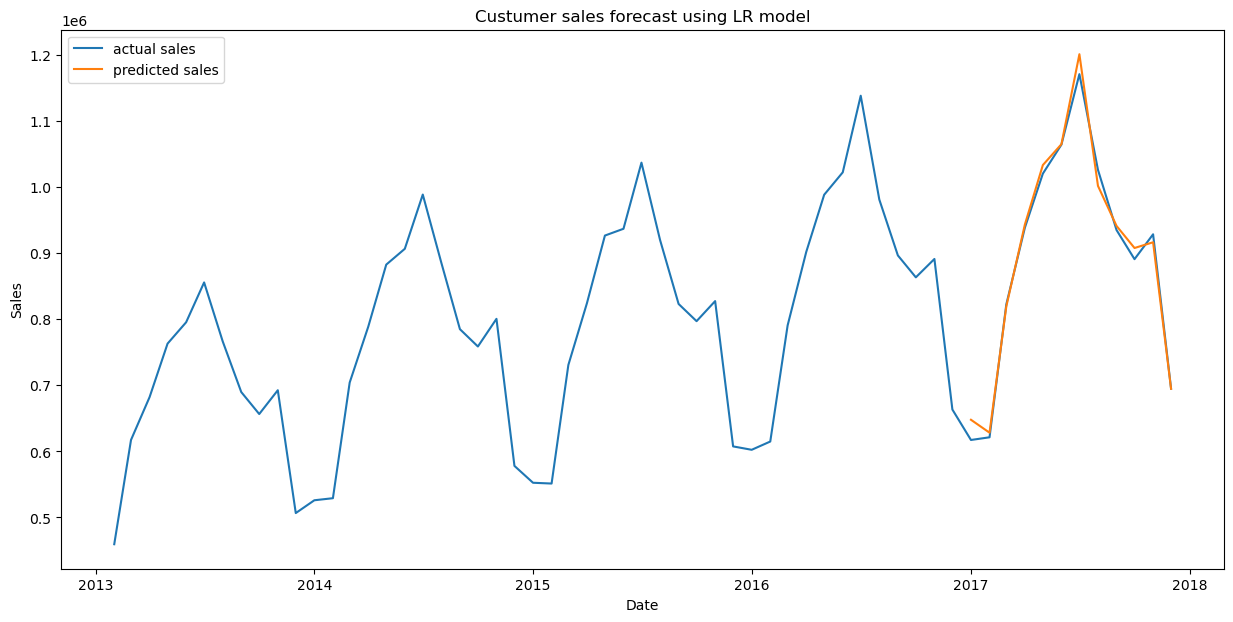

In [49]:
plt.figure(figsize=(15,7))
plt.plot(monthly_sales['date'],monthly_sales['sales'])
plt.plot(predict_df['date'],predict_df['Linear Prediction'])
plt.title('Custumer sales forecast using LR model')
plt.xlabel("Date")
plt.ylabel('Sales')
plt.legend(["actual sales",'predicted sales'])
plt.show()